### Установка TensоrFlow и Keras 

In [1]:
# !pip install tensorflow==2.1.0 Keras==2.3.1

### Импорт необходимых инструментов

In [26]:
import tensorflow as tf # Машинное обучение
import keras # API для TensorFlow
import numpy as np # Научные вычисления
import matplotlib.pyplot as plt # Визуализация 2D и 3D графики
import matplotlib.image as mpimg # Работа с изображениями
import pandas as pd # Обработка и анализ данных
import seaborn as sns # Визуализация (надстройка над matplotlib)
import pylab # Построение графиков
import os # Работа с файловой системой
import zipfile # Работа с ZIP-архивами

from tensorflow.keras.preprocessing.image import ImageDataGenerator # Формирование набора данных для TF
from keras.preprocessing import image # Инструменты для увеличения данных в реальном времени на данных изображения
from PIL import Image # Работа с изображениями

# Визуализация в виде обычного изображения
%matplotlib inline

### Настройки необходимых инструментов

In [3]:
pd.set_option('display.max_columns', None) # Максимальное количество отображаемых столбцов
pd.set_option('display.max_rows', None) # Максимальное количество отображаемых строк

### Загрузка набора данных

In [30]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
#     -O /tmp/horse-or-human.zip

# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
#     -O /tmp/validation-horse-or-human.zip

### Распаковка архива (Обучающая выборка)

In [6]:
# local_zip = '/tmp/horse-or-human.zip' # Архив
# zip_ref = zipfile.ZipFile(local_zip, 'r') # Чтение архива

# dir = '/Users/dl/GitHub/coursera/Intro_to_TF_for_Artificial_Intelligence_ML_and_DL/db/horse-or-human'

# # Извлечение архива в указанный каталог
# zip_ref.extractall(dir)
# zip_ref.close() # Закрытие архива

### Распаковка архива (Валидационная выборка)

In [32]:
# local_zip = '/tmp/validation-horse-or-human.zip' # Архив
# zip_ref = zipfile.ZipFile(local_zip, 'r') # Чтение архива

# dir_val = '/Users/dl/GitHub/coursera/Intro_to_TF_for_Artificial_Intelligence_ML_and_DL/db/validation-horse-or-human'

# # Извлечение архива в указанный каталог
# zip_ref.extractall(dir_val)
# zip_ref.close() # Закрытие архива

### Каталоги набора данных

In [35]:
# Обучающая выборка
train_horse_dir = os.path.join(dir, 'horses') # Класс 1 (Лошади)
train_human_dir = os.path.join(dir, 'humans') # Класс 2 (Люди)

# Валидационная выборка
val_horse_dir = os.path.join(dir_val, 'horses') # Класс 1 (Лошади)
val_human_dir = os.path.join(dir_val, 'humans') # Класс 2 (Люди)

### Пример имен файлов

In [36]:
# Списки файлов (Обучающая выборка)
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

# Списки файлов (Валидационная выборка)
val_horse_names = os.listdir(val_horse_dir)
val_human_names = os.listdir(val_human_dir)

# Отображение в DataFrame
list_of_files = {
    'Horses': train_horse_names,
    'Humans': train_human_names,
    'Horses_val': val_horse_names,
    'Humans_val': val_human_names
}

# Отображение в DataFrame
df_files = pd.DataFrame.from_dict(data = list_of_files, orient = 'index').transpose() # Вероятности
df_files[:10].head(None) # Отображение первых N строк или все если указать None

,Horses,Humans,Horses_val,Humans_val
0,horse43-5.png,human17-22.png,horse1-204.png,valhuman04-20.png
1,horse06-5.png,human10-17.png,horse2-112.png,valhuman03-01.png
2,horse20-6.png,human10-03.png,horse3-498.png,valhuman04-08.png
3,horse04-7.png,human07-27.png,horse5-032.png,valhuman03-15.png
4,horse41-7.png,human09-22.png,horse5-018.png,valhuman01-04.png
5,horse22-4.png,human05-22.png,horse1-170.png,valhuman01-10.png
6,horse19-2.png,human02-03.png,horse5-192.png,valhuman01-11.png
7,horse24-2.png,human02-17.png,horse1-411.png,valhuman01-05.png
8,horse37-8.png,human15-27.png,horse4-232.png,valhuman03-14.png
9,horse02-1.png,human12-12.png,horse3-070.png,valhuman03-00.png


### Количество элементов в каждом классе

In [41]:
print('Обучающий набор:')
print('\tВсего изображений лошадей:', len(os.listdir(train_horse_dir)))
print('\tВсего изображений людей:', len(os.listdir(train_human_dir)))

print('Валидационный набор:')
print('\tВсего изображений лошадей:', len(os.listdir(val_horse_dir)))
print('\tВсего изображений людей:', len(os.listdir(val_human_dir)))

Тестовый набор:
	Всего изображений лошадей: 500
	Всего изображений людей: 527
Валидационный набор:
	Всего изображений лошадей: 128
	Всего изображений людей: 128


### Отображение изображения из обучающей выборки

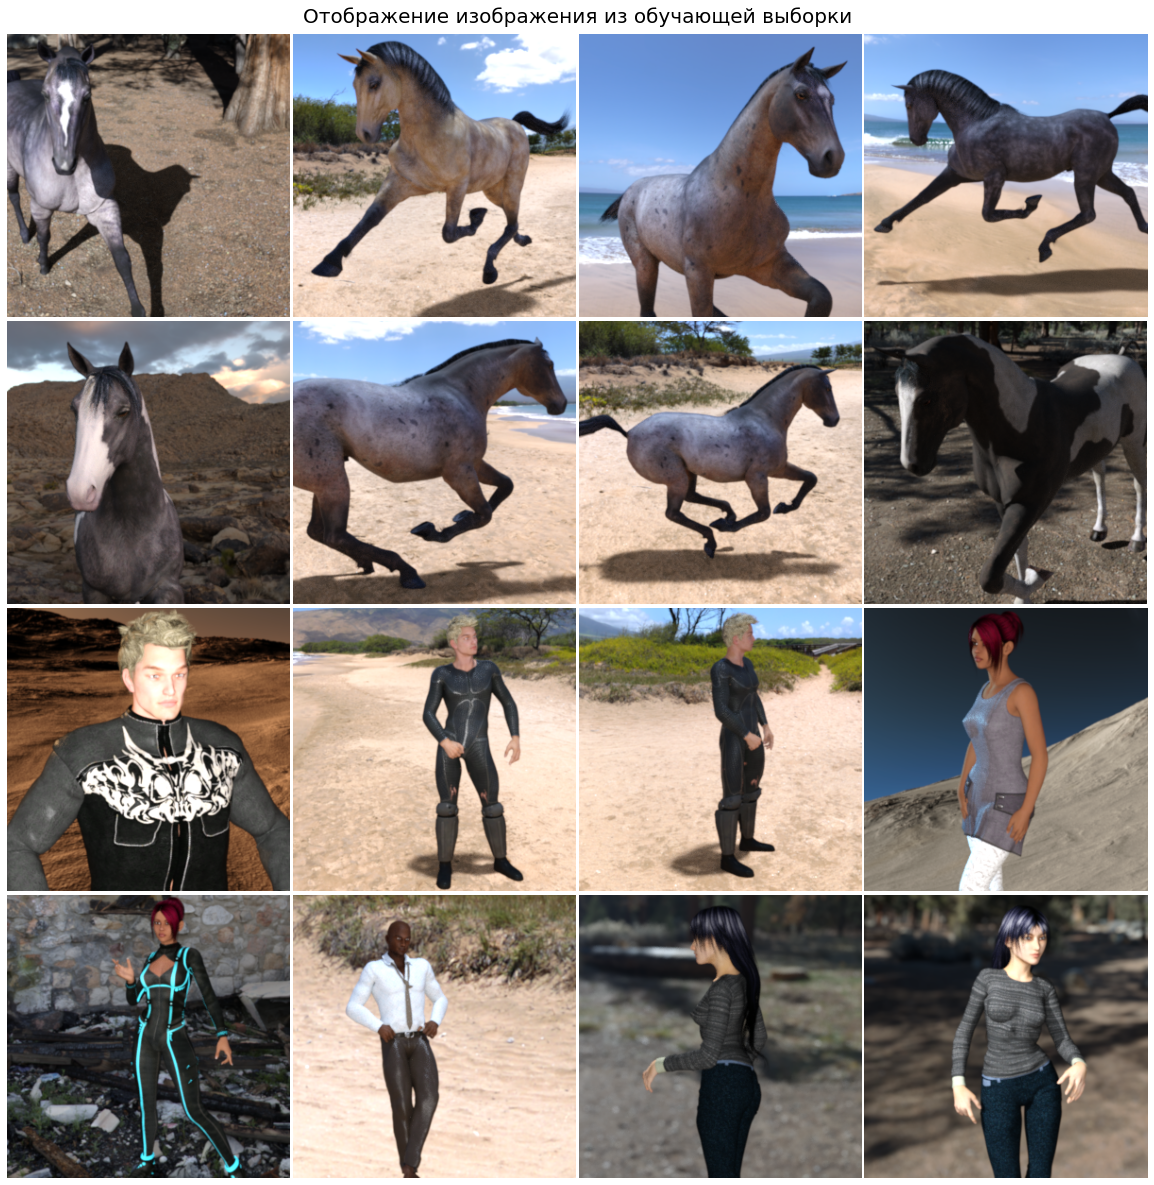

In [42]:
nrows = 4 # Количество строк
ncols = 4 # Количество столбцов

pic_index = 0 # Счетчик изображений

fig = plt.gcf() # Создание фигуры
fig.set_size_inches(ncols * 4, nrows * 4) # Установка размера фигуры в дюймах

pic_index += 8
next_horse_pix = [
    os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index - 8:pic_index]
]
next_human_pix = [
    os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index - 8:pic_index]
]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Отключение осей

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.suptitle(
    'Отображение изображения из обучающей выборки', # Заголовок
    fontsize = 20, # Размер заголовка
    fontdict = {
        'color': '#000000' # Цвет заголовка
    },
    y = 1.020 # Отступ заголовка от вершины осей
)

plt.tight_layout(pad = 0.4) # Установка расстояния между осями

plt.show() # Отображение фигуры

### Предварительная обработка данных

In [44]:
# Нормализация набора изображений и диапазона [0:255] в диапазоне [0:1]
train_datagen = ImageDataGenerator(rescale = 1 / 255) # Обучающая выборка
val_datagen = ImageDataGenerator(rescale = 1 / 255) # Валидационная выборка

# Формирование обучающей выборки
train_generator = train_datagen.flow_from_directory(
    dir, # Корневая директория
    target_size = (300, 300), # Размер изображений
    batch_size = 128, # Размер выборки
    class_mode = 'binary' # Формат классификации
)

# Формирование обучающей выборки
val_generator = val_datagen.flow_from_directory(
    dir_val, # Корневая директория
    target_size=(300, 300), # Размер изображений
    batch_size = 32, # Размер выборки
    class_mode='binary' # Формат классификации
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Определение модели нейронной сети

**Sequential**: Последовательные слои в нейронной сети

**Dense**: Добавление слоя с нейронами

In [45]:
# Модель с последовательными слоями в нейронной сети
model = keras.Sequential([
    # Сверточный слой
    keras.layers.Conv2D(
        16, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu, # Функция активации
        input_shape=(300, 300, 3) # Размер входных данных
    ),
    keras.layers.MaxPooling2D(2, 2), # Уменьшение размерности
    # Сверточный слой
    keras.layers.Conv2D(
        32, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu # Функция активации
    ),
    keras.layers.MaxPooling2D(2, 2), # Уменьшение размерности
    # Сверточный слой
    keras.layers.Conv2D(
        64, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu # Функция активации
    ),
    keras.layers.MaxPooling2D(2, 2), # Уменьшение размерности
    # Сверточный слой
    keras.layers.Conv2D(
        64, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu # Функция активации
    ),
    keras.layers.MaxPooling2D(2, 2), # Уменьшение размерности
    # Сверточный слой
    keras.layers.Conv2D(
        64, # Количество фильтров
        (3, 3), # Размер свертки
        activation = tf.nn.relu # Функция активации
    ),
    keras.layers.MaxPooling2D(2, 2), # Уменьшение размерности
    keras.layers.Flatten(), # Преобразование массива пикселей в вектор пикселей
    # Полносвязный скрытый слой
    keras.layers.Dense(
        units = 512, # Количество нейронов
        activation = tf.nn.relu # Функция активации
    ),
    # Полносвязный слой
    keras.layers.Dense(1, activation = 'sigmoid')
])

### Построение модели нейронной сети

In [46]:
# Сборка модели
model.compile(
    # Оптимизатор
    optimizer = tf.keras.optimizers.RMSprop(
        lr = 0.001 # Скорость обучения
    ),
    loss = 'binary_crossentropy', # Функция потерь
    metrics = ['accuracy'] # Метрика оценивания
)

### Визуализация модели

In [47]:
model.summary() # Визуализация модели

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 33, 33, 64)       

### Остановка процесса обучения

In [48]:
class myCallback(keras.callbacks.Callback):
    """
    Остановка процесса обучения
    """
    
    def on_epoch_end(self, epoch, logs = {}):
        # Сравнение точности на текущей эпохе
        if(logs.get('accuracy') > 0.95):
              self.model.stop_training = True # Остановка обучения

### Обучение модели

In [50]:
callbacks = myCallback() # Остановка процесса обучения

# Обучение модели
model.fit(
    train_generator, # Обучающая выборка
    steps_per_epoch = 8, # Общее количество шагов
    epochs = 15, # Количество эпох
    verbose = 2, # Отключение вывода
    validation_data = val_generator, # Валидационная выборка
    validation_steps = 8, # Шаг валидации
    callbacks = [callbacks] # Вызов функции после каждой эпохи
)

Epoch 1/15
 - 24s - loss: 1.1492 - accuracy: 0.5117 - val_loss: 0.7378 - val_accuracy: 0.5000
Epoch 2/15
 - 24s - loss: 0.7894 - accuracy: 0.6185 - val_loss: 0.6456 - val_accuracy: 0.5508
Epoch 3/15
 - 24s - loss: 0.5631 - accuracy: 0.6974 - val_loss: 0.4009 - val_accuracy: 0.8672
Epoch 4/15
 - 24s - loss: 0.5106 - accuracy: 0.8065 - val_loss: 0.8611 - val_accuracy: 0.5039
Epoch 5/15
 - 27s - loss: 0.4652 - accuracy: 0.8242 - val_loss: 0.4855 - val_accuracy: 0.8398
Epoch 6/15
 - 21s - loss: 0.2822 - accuracy: 0.8618 - val_loss: 0.8918 - val_accuracy: 0.8047
Epoch 7/15
 - 27s - loss: 0.1452 - accuracy: 0.9375 - val_loss: 0.9263 - val_accuracy: 0.8750
Epoch 8/15
 - 24s - loss: 0.8585 - accuracy: 0.8487 - val_loss: 0.7544 - val_accuracy: 0.8477
Epoch 9/15
 - 24s - loss: 0.1263 - accuracy: 0.9522 - val_loss: 0.5928 - val_accuracy: 0.8633


In [54]:
model.evaluate(
    val_generator
)

8/8 [==============================] - 2s 257ms/step


[0.5317791700363159, 0.86328125]

### Предсказание

In [28]:
path = '/Users/dl/Desktop/1.jpeg' # Путь к изображению

# Загрузка изображения
img = image.load_img(
    path, target_size = (300, 300)
)

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)

if classes[0] > 0.5:
    print('Человек')
else:
    print('Лошадь')

Лошадь
